In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# import
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import PIL.Image as Image
import tensorflow_hub as hub
from keras.callbacks import ModelCheckpoint, EarlyStopping

### **Data exploration and Making datasets** 

In [17]:
datadir = '/content/drive/MyDrive/newdata'

img= image.load_img(datadir+'/opened/open_100.jpeg')

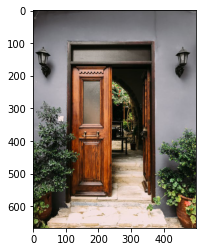

In [18]:
plt.imshow(img);

In [ ]:
img_array = cv2.imread(datadir+'/opened/open_100.jpeg')
img_array

array([[[ 29,  31,  31],
        [ 27,  29,  29],
        [ 25,  27,  27],
        ...,
        [105, 102, 104],
        [105, 102, 104],
        [105, 102, 104]],

       [[ 27,  29,  29],
        [ 25,  27,  27],
        [ 23,  25,  25],
        ...,
        [113, 110, 112],
        [111, 108, 110],
        [110, 107, 109]],

       [[ 24,  26,  26],
        [ 22,  24,  24],
        [ 21,  23,  23],
        ...,
        [107, 104, 106],
        [104, 101, 103],
        [101,  98, 100]],

       ...,

       [[  9,  16,  13],
        [  9,  16,  13],
        [ 10,  15,  13],
        ...,
        [ 18,  42,  84],
        [ 20,  44,  86],
        [ 22,  46,  88]],

       [[ 10,  15,  13],
        [ 10,  15,  13],
        [ 10,  15,  13],
        ...,
        [ 19,  42,  80],
        [ 22,  43,  81],
        [ 20,  43,  81]],

       [[ 12,  15,  13],
        [ 10,  15,  13],
        [  9,  16,  13],
        ...,
        [ 19,  41,  77],
        [ 21,  40,  77],
        [ 18,  40,  76]]

In [ ]:
img_array.shape

(667, 500, 3)

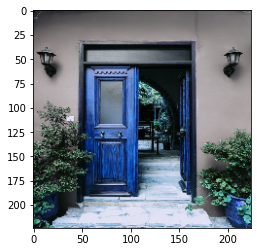

In [ ]:
img_size = 224

new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array)
plt.show()


### **Data generator**

In [19]:
datagen = ImageDataGenerator(rescale=1/255,
                             validation_split=0.1)

In [20]:
#loading the training and testing data
train_dataset = datagen.flow_from_directory(datadir,
                                            target_size = (224,224),
                                            batch_size = 3,
                                            class_mode = 'binary',
                                            shuffle = True,
                                            seed=123,
                                            subset = 'training')
validation_dataset = datagen.flow_from_directory(datadir,
                                        target_size = (224,224),
                                        batch_size = 3,
                                        class_mode = 'binary',
                                        shuffle = True,
                                        seed=123,
                                        subset='validation')

Found 156 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [21]:
train_dataset.class_indices

{'closed': 0, 'opened': 1}

In [22]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

## **Image classification on pretrained model ***mobilenet_v2*** (transfer learning)**

In [23]:
 mc = ModelCheckpoint(filepath = '/content/drive/MyDrive/newdata/best_model.h5',
                     monitor = 'val_loss',
                     verbose = 1,
                     save_best_only=True)

es = EarlyStopping(monitor = 'val_loss',
                 min_delta = 0.01,
                 patience = 10,
                 verbose = 1)

cb = [mc,es]

In [24]:
feature_extractor_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(feature_extractor_model, input_shape=(224,224,3), trainable = False)

In [25]:
model = tf.keras.Sequential([pretrained_model, tf.keras.layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [26]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # RMSprop(learning_rate=0.001)

In [28]:
hist = model.fit_generator(train_dataset, steps_per_epoch =3, epochs = 1
          , validation_data=validation_dataset,callbacks = cb) #validation_split=o.1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


3/3 [==============================] - ETA: 0s - loss: 0.6561 - accuracy: 0.5556
Epoch 00001: val_loss improved from 0.59316 to 0.53574, saving model to /content/drive/MyDrive/newdata/best_model.h5
3/3 [==============================] - 7s 3s/step - loss: 0.6561 - accuracy: 0.5556 - val_loss: 0.5357 - val_accuracy: 0.7500


In [29]:
tf.keras.models.save_model(model, 'my_model.hdf5') #saving the trained model

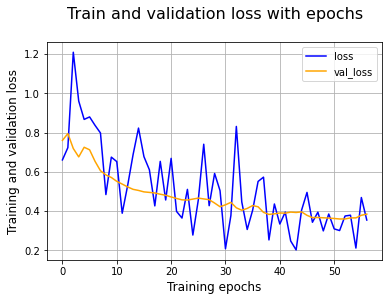

In [ ]:
#ploting results with loss
plt.plot(hist.history['loss'], color='blue', label = 'loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.grid(True)
plt.title('Train and validation loss with epochs\n',fontsize=16)
plt.xlabel('Training epochs', fontsize=12)
plt.ylabel('Training and validation loss', fontsize=12)
plt.legend()
plt.show()

In [ ]:
model.evaluate(validation_dataset)

6/6 [==============================] - 0s 36ms/step - loss: 0.3852 - accuracy: 0.8750


[0.3852075934410095, 0.875]

## **GUI with gradio**

In [5]:
!pip install gradio

     |████████████████████████████████| 871 kB 4.2 MB/s 
     |████████████████████████████████| 1.1 MB 46.5 MB/s 
     |████████████████████████████████| 2.0 MB 38.2 MB/s 
     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 52 kB 812 kB/s 
     |████████████████████████████████| 210 kB 45.6 MB/s 
     |████████████████████████████████| 144 kB 51.8 MB/s 
     |████████████████████████████████| 94 kB 2.7 MB/s 
     |████████████████████████████████| 271 kB 55.5 MB/s 
     |████████████████████████████████| 58 kB 5.6 MB/s 
     |████████████████████████████████| 10.9 MB 39.9 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 61 kB 461 kB/s 
     |████████████████████████████████| 3.6 MB 40.3 MB/s 
     |████████████████████████████████| 856 kB 49.2 MB/s 
     |████████████████████████████████| 58 kB 6.0 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=ad92

### ***Making the predictions*** 

In [34]:
prediction = model.predict(np.zeros((1,224,224,3)))

In [72]:
import gradio as gr
import tensorflow as tf
import requests


def classify_image(inp):
  inp = inp.reshape((1, 224, 224, 3))
  prediction = model.predict(inp).tolist()[0]
  #image_class ='door'
  image_class = ['closed','opened']

  return {image_class[i]: prediction[i] for i in range(2)}


In [73]:
image = gr.inputs.Image(shape=(224, 224))
label = gr.outputs.Label()

gr.Interface(fn=classify_image, inputs=image, outputs=label).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://38293.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7fbbed04d390>,
 'http://127.0.0.1:7875/',
 'https://38293.gradio.app')